# Political Polarization and Media: A Case Study of Turkey

[Talha Oz](http://talhaoz.com)

Political media bias is an important problem in political communications literature[]. In this article, based on the cognitive dissonance theory and using publicly available social media data, I propose cost effective computational methods to measure the political alignments of news outlets and to create an individual level partisanship map of a country’s media landscape. The Turkish news media is believed to have a high degree of polarized pluralism and political parallelism[], and it has only become worse especially since the government corruption scandal in December 2013 and the “witch haunt” following it []. As a case study, I compiled two kinds of observational datasets using Twitter API, for each kind, one before and after the “witch haunt”: the first being the Turkish news audience dataset and the second one relates to the political audience. First, using a network theoretical approach, I propose a method to detect the media groups at different granularities. It is observed that media positioning and clusters are very well aligned with the known ideologies of the media groups. I then measure the polarity of the news audiences’ political leanings and also investigate the news media preference of the party followers. Through such analysis I show that the media preferences of parties are quite different from one another and party descriptiveness of the media is almost completely reverse ordered for the parties in the opposite camps. Findings are not only verified by comparing the measurements before and after the “which haunt” as a longitudinal study, but also validated by the results of two cross-sectional surveys. Finally, interactive visualizations are created to facilitate the interpretation of the results and highlight the findings. Thus, I show that the proposed method is a cost-effective way of measuring political media bias and can be complemented to traditional survey studies.

## Data
I compiled two kinds of observational datasets using Twitter API, for each kind, one before and after the “witch haunt”: the first being the Turkish news audience dataset and the second one relates to the political audience.
###News audience
Twitter follower IDs of 35 news media on the dates expressed in the file names:
- **data/outlets/2013-12.json**
- **data/outlets/2015-07.json**

###Political audience
Twitter follower IDs of 4 political party and the Hizmet Movement on the dates expressed in the file names:
- **data/parties/2014_01/**
- **data/parties/2015_07/**

## Methods & Analysis

In [1]:
%cd ..

C:\Users\Talha\Documents\WinPython3\projects\TR-Media-Politics


In [2]:
import pandas as pd
import json
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
#read 2015 news data
m15files = glob.glob('data/outlets/2015-07/*')
m15 = {}
for fname in m15files:
    with open(fname) as f:
        m = json.load(f)
        outlet = os.path.basename(fname)[:-5]
        m15[outlet] = set(m)

In [12]:
#some account names have changed in this ~1.5 years period
#clean the data and save to files
set(m15.keys())-set(m13.keys())

{'SHaberTV',
 'Tarafinternet',
 'aksam_gazetesi',
 'imc_televizyonu',
 'ozgurgundemweb'}

In [10]:
#party audience before witch haunt started
p13 = {}
for fname in glob.glob('data/parties/2014_01/*'):
    with open(fname) as f:
        p = json.load(f)
        for k in p.keys():
            p13[k] = set(p[k]['followers'])

In [14]:
mdf13 = pd.DataFrame(index=sorted(m13.keys()),columns=['f13','f15'])
mdf13['f13'] = [len(m13[m]) for m in mdf13.index.values]
mdf13['f15'] = [len(m15[m]) for m in mdf13.index.values]

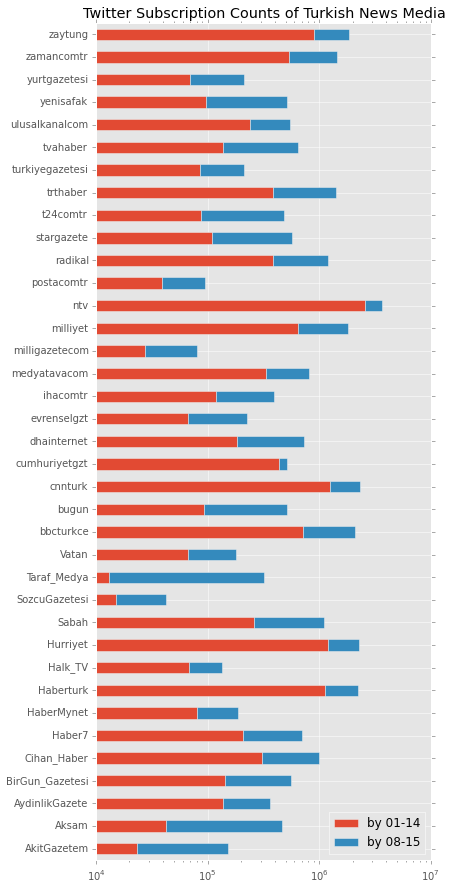

In [21]:
fig, ax = plt.subplots()
mdf13.plot(ax=ax,kind='barh',stacked='true',figsize=(6,15),logx=True)
ax.legend(['by 01-14','by 08-15'],loc=4)
ax.set_title('Twitter Subscription Counts of Turkish News Media')

In [22]:
fig.savefig('stacked.png',dpi=300,bbox_inches='tight');

In [11]:
#party audience after witch haunt started
p15 = {}
for fname in glob.glob('data/parties/2015_07/*'):
    with open(fname) as f:
        party = fname.split('/')[-1][:-5]
        p15[party] = set(json.load(f))

In [12]:
# we don't use these in this analysis
parties = ['AKP','CHP','MHP','HDP']
for p in (p13,p15):
    del p['Herkul_Nagme']
    del p['FGulencomTR']

In [13]:
ptw15 = {}
ptw15['AKP'] = ['Akparti','AkTanitimMedya']
ptw15['CHP'] = ['herkesicinCHP']
ptw15['MHP'] = ['MHP_Bilgi','Ulku_Ocaklari']
ptw15['HDP'] = ['HDPgenelmerkezi','HDPonline']

In [14]:
ptw13 = {}
ptw13['AKP'] = ['Akparti','AkTanitimMedya','AKKULIS']
ptw13['CHP'] = ['CHP_online','herkesicinCHP']
ptw13['MHP'] = ['MHP_Bilgi','Ulku_Ocaklari']
ptw13['HDP'] = ['BDPgenelmerkez','HDP_Kongre']

In [15]:
#get unique followers set for each political group
pf13 = {}
for party in ptw13.keys():
    rest = set(p13.keys()) - set(ptw13[party])
    pf13[party] = set.union(*[p13[p] for p in ptw13[party]])
    restf = set.union(*[p13[p] for p in rest])
    pf13[party] = pf13[party] - restf

In [16]:
#get unique followers set for each political group
pf15 = {}
for party in ptw15.keys():
    rest = set(p15.keys()) - set(ptw15[party])
    pf15[party] = set.union(*[p15[p] for p in ptw15[party]])
    restf = set.union(*[p15[p] for p in rest])
    pf15[party] = pf15[party] - restf

In [23]:
#get unique followers set for each media outlet in the study
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr']
conservatives = ['AkitGazetem','yenisafak','milligazetecom','turkiyegazetesi']
mf13 = {}
for outlet in outlets:
    rest = set(outlets+conservatives) - set([outlet])
    restf = set.union(*[m13[m] for m in rest])
    mf13[outlet] = m13[outlet] - restf
mf13['conservatives'] = set.union(*[m13[m] for m in conservatives]) - set.union(*[m13[m] for m in outlets])

In [17]:
#get unique followers set for each media outlet in the study
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr']
conservatives = ['AkitGazetem','yenisafak','milligazetecom','turkiyegazetesi']
mf15 = {}
for outlet in outlets:
    rest = set(outlets+conservatives) - set([outlet])
    restf = set.union(*[m15[m] for m in rest])
    mf15[outlet] = m15[outlet] - restf
mf15['conservatives'] = set.union(*[m15[m] for m in conservatives]) - set.union(*[m15[m] for m in outlets])

In [18]:
# unique parties of unique media followers
rows = []
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr','conservatives']
# united set of followers of any party
allp15 = set.union(*pf15.values())
for outlet in outlets:
    md = {}
    for party in ptw15.keys():
        md[party] = 100 * len(mf15[outlet] & pf15[party]) / len(mf15[outlet] & allp15)
    rows.append(md)
df15 = pd.DataFrame(rows,index=outlets) 
df15

,AKP,CHP,HDP,MHP
zamancomtr,11.842296,27.917089,21.296565,38.944050
Sabah,52.791183,14.927612,13.212469,19.068736
Hurriyet,7.783446,36.485108,33.368438,22.363008
cumhuriyetgzt,1.546961,36.795580,55.773481,5.883978
milliyet,6.857227,44.043246,22.968009,26.131517
postacomtr,5.612520,52.779277,15.272531,26.335672
conservatives,75.312382,5.734360,8.115613,10.837646


In [19]:
#get unique followers set for each media outlet in the study
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr']
conservatives = ['AkitGazetem','yenisafak','milligazetecom','turkiyegazetesi']
mf = {}
for outlet in outlets:
    rest = set(outlets+conservatives) - set([outlet])
    restf = set.union(*[m13[m] for m in rest])
    mf[outlet] = m13[outlet] - restf
mf['conservatives'] = set.union(*[m13[m] for m in conservatives]) - set.union(*[m13[m] for m in outlets])

In [25]:
# unique parties of unique media followers
rows = []
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr','conservatives']
# united set of followers of any party
allp13 = set.union(*pf13.values())
for outlet in outlets:
    md = {}
    for party in ptw13.keys():
        md[party] = 100 * len(mf13[outlet] & pf13[party]) / len(mf13[outlet] & allp13)
    rows.append(md)
df13 = pd.DataFrame(rows,index=outlets) 
df13

,AKP,CHP,HDP,MHP
zamancomtr,64.973927,16.919374,5.383073,12.723626
Sabah,48.365316,23.454158,9.950249,18.230277
Hurriyet,11.547491,57.286974,9.095235,22.070300
cumhuriyetgzt,1.276128,89.103611,5.856668,3.763592
milliyet,7.409568,50.816803,19.988331,21.785298
postacomtr,7.268170,49.874687,12.030075,30.827068
conservatives,80.856299,7.349081,4.281496,7.513123


In [26]:
df = df13.append(df15)

In [27]:
grouped = df.groupby(by=df.index)
#df.plot(kind='bar');

In [28]:
outlets = ['zamancomtr','Sabah','Hurriyet','cumhuriyetgzt','milliyet','postacomtr','conservatives']

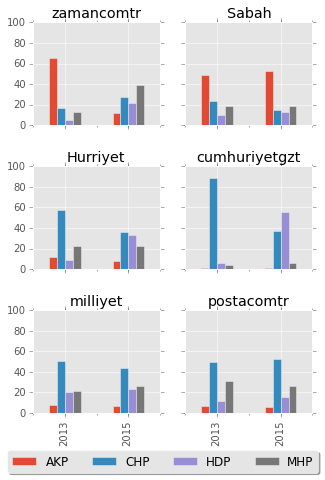

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,sharex=True,sharey=True,figsize=(5,7))
plt.locator_params(nbins=5)

for i,ax in enumerate((ax1,ax2,ax3,ax4,ax5,ax6)):
    grouped.get_group(outlets[i]).plot(kind='bar',title=outlets[i],ax=ax,legend=False)
    ax.set_xticklabels(('2013','2015'));
fig.subplots_adjust(hspace=0.4)
ax.legend(loc='lower center', bbox_to_anchor=(-0.18, -0.64),
          ncol=4, fancybox=True, shadow=True)
#fig.savefig('all.png',dpi=600,bbox_inches='tight');

In [39]:
grouped.get_group('milliyet').iloc[0]

AKP     7.409568
CHP    50.816803
HDP    19.988331
MHP    21.785298
Name: milliyet, dtype: float64

In [46]:
grouped.get_group('milliyet').apply(lambda y: 1/sum(x**2 for x in y),axis=1)

milliyet    0.000285
milliyet    0.000313
dtype: float64

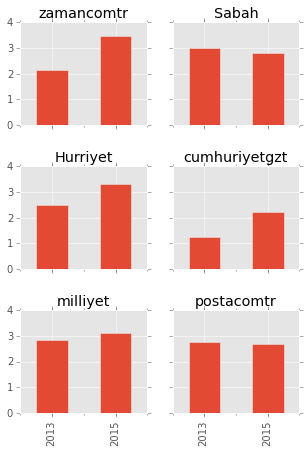

In [58]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,sharex=True,sharey=True,figsize=(5,7))
plt.locator_params(nbins=5)

for i,ax in enumerate((ax1,ax2,ax3,ax4,ax5,ax6)):
    grouped.get_group(outlets[i]).apply(lambda y: 1/sum((x/100)**2 for x in y),axis=1).plot(kind='bar',title=outlets[i],ax=ax,legend=False)
    ax.set_xticklabels(('2013','2015'));
fig.subplots_adjust(hspace=0.4)
#ax.legend(loc='lower center', bbox_to_anchor=(-0.18, -0.64), ncol=4, fancybox=True, shadow=True)

In [61]:
aa = []
for outlet in outlets:
    aa.append(grouped.get_group(outlet).apply(lambda y: 1/sum((x/100)**2 for x in y),axis=1))

In [82]:
for a in aa:
    print(a.index[0])

zamancomtr
Sabah
Hurriyet
cumhuriyetgzt
milliyet
postacomtr
conservatives


In [77]:

parties = ['AKP','CHP','MHP','HDP']
df3 = pd.DataFrame(columns=parties)
for o in outlets:
    df3 = df3.append(grouped.get_group(outlet).apply(lambda y: pd.Series(1/sum((x/100)**2 for x in y)),axis=1),ignore_index=True)
df3.index = 'Zaman Sabah Hurriyet Cumhuriyet Milliyet postacomtr Conservatives'.split()
df3

/Users/toz/Documents/workspace/p3/lib/python3.4/site-packages/pandas/core/index.py:1266: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)
/Users/toz/Documents/workspace/p3/lib/python3.4/site-packages/pandas/core/index.py:1280: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)


ValueError: Length mismatch: Expected axis has 14 elements, new values have 7 elements

In [30]:
parties = ['AKP','CHP','MHP','HDP']
df2 = pd.DataFrame(columns=parties)
for o in outlets:
    x = grouped.get_group(o)
    df2 = df2.append(x.apply(lambda x: pd.Series(x.iloc[1]-x.iloc[0],name=o)),ignore_index=True)
df2.index = 'Zaman Sabah Hurriyet Cumhuriyet Milliyet postacomtr Conservatives'.split()
df2

,AKP,CHP,HDP,MHP
Zaman,-53.131631,10.997715,15.913492,26.220424
Sabah,4.425867,-8.526546,3.262220,0.838459
Hurriyet,-3.764045,-20.801866,24.273203,0.292708
Cumhuriyet,0.270833,-52.308031,49.916813,2.120386
Milliyet,-0.552341,-6.773556,2.979678,4.346219
postacomtr,-1.655650,2.904590,3.242456,-4.491396
Conservatives,-5.543918,-1.614721,3.834117,3.324522


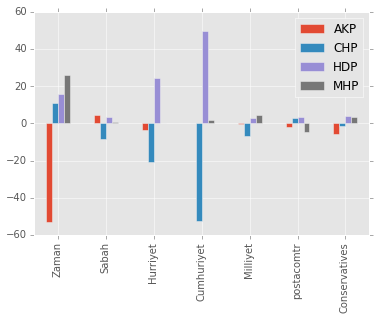

In [31]:
df2.plot(kind='bar')

In [32]:
df

,AKP,CHP,HDP,MHP
zamancomtr,64.973927,16.919374,5.383073,12.723626
Sabah,48.365316,23.454158,9.950249,18.230277
Hurriyet,11.547491,57.286974,9.095235,22.070300
cumhuriyetgzt,1.276128,89.103611,5.856668,3.763592
milliyet,7.409568,50.816803,19.988331,21.785298
postacomtr,7.268170,49.874687,12.030075,30.827068
conservatives,80.856299,7.349081,4.281496,7.513123
zamancomtr,11.842296,27.917089,21.296565,38.944050
Sabah,52.791183,14.927612,13.212469,19.068736
Hurriyet,7.783446,36.485108,33.368438,22.363008


In [410]:
df.index = 'Zaman Sabah Hurriyet Cumhuriyet Milliyet Conservatives'.split() * 2

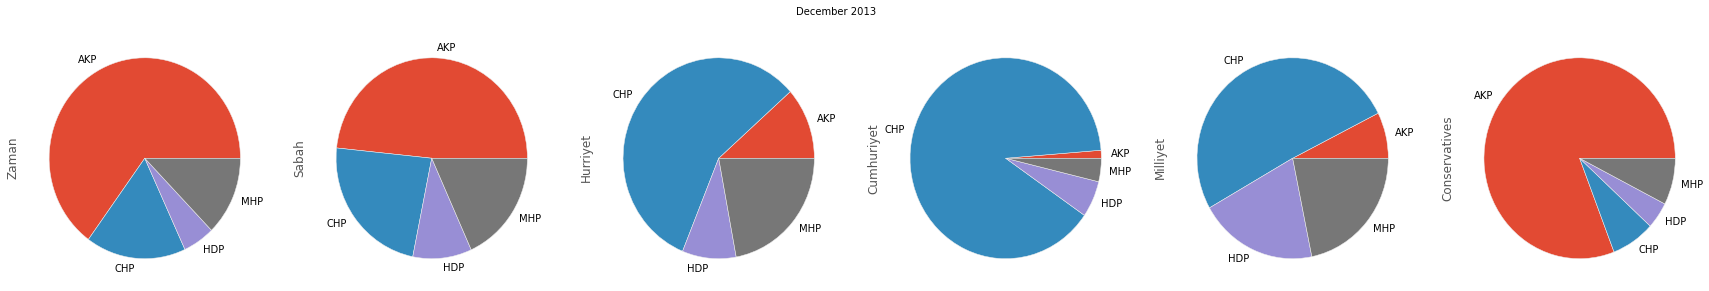

In [428]:
ax = df.transpose().iloc[:,:6].plot(kind='pie',subplots=True,legend=False,figsize=(30,4.5),title='December 2013')
ax[0].figure.savefig('pie2013.png',dpi=300,bbox_inches='tight');

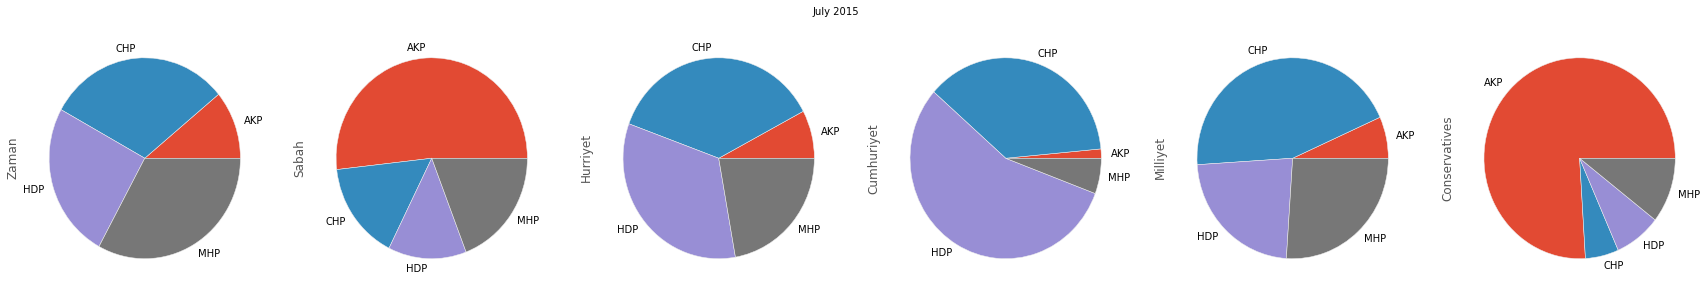

In [429]:
ax = df.transpose().iloc[:,6:].plot(kind='pie',subplots=True,legend=False,figsize=(30,4.5),title='July 2015');
ax[0].figure.savefig('pie2015.png',dpi=300,bbox_inches='tight');